In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.base import clone


In [ ]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
# Load the dataset (replace with your filename)
df = pd.read_csv("/content/data.csv")

# Show first rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# shape
print(df.shape)

(569, 32)


In [ ]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Statistics of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Finding the missing value
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# clos
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Exploratory Data Analysis (EDA)


--- Exploratory Data Analysis ---


/tmp/ipython-input-18458486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=df, palette={'B': 'royalblue', 'M': 'darkorange'})


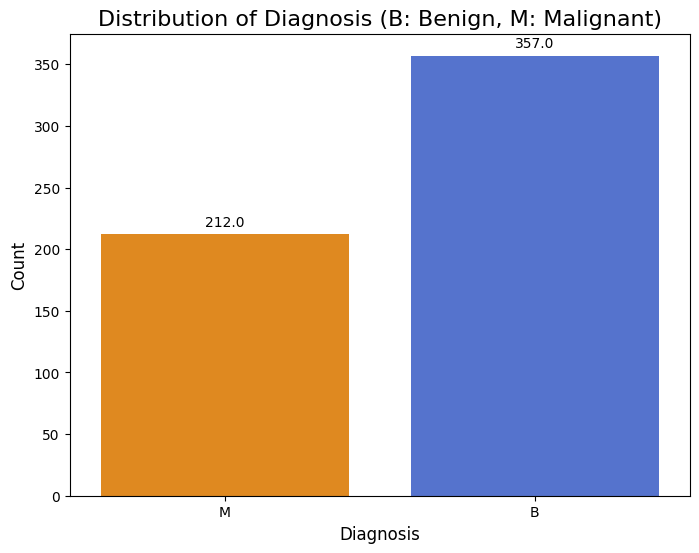

In [ ]:
print("\n--- Exploratory Data Analysis ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette={'B': 'royalblue', 'M': 'darkorange'})
plt.title('Distribution of Diagnosis (B: Benign, M: Malignant)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

 Feature Engineering and Data Splitting


In [ ]:
print("\n--- Feature Engineering and Data Splitting ---")
# Define features (X) by excluding 'id' and 'diagnosis', and the target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

print(f"Number of features: {X.shape[1]}")

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



--- Feature Engineering and Data Splitting ---
Number of features: 30
Training set size: 455 samples
Test set size: 114 samples


Model Training with a Pipeline

In [ ]:
print("\n--- Model Training ---")
# Create the pipeline with a scaler and the Random Forest model
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train the model
print("Training the Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Model training completed successfully.")



--- Model Training ---
Training the Random Forest model...
Model training completed successfully.


Performance Evaluation


--- Model Evaluation on Test Set ---

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Area Under the ROC Curve (AUROC): 0.9929


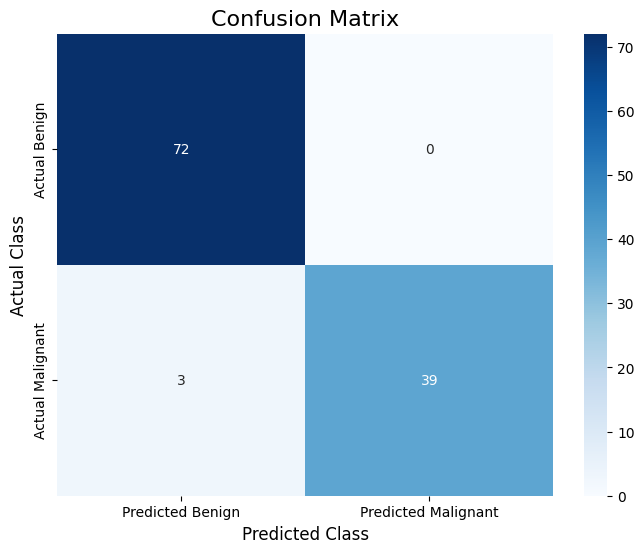

In [ ]:
print("\n--- Model Evaluation on Test Set ---")
# Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# --- Classification Report and AUROC ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under the ROC Curve (AUROC): {roc_auc:.4f}")

# --- Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()


 Cross-Validation for Robustness Check

In [ ]:
print("\n--- Cross-Validation ---")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

print("Starting 5-Fold Cross-Validation...")
for fold, (train_indices, test_indices) in enumerate(skf.split(X, y)):
    # Clone the pipeline to ensure a fresh model for each fold
    pipeline_clone = clone(rf_pipeline)

    # Split data for the current fold
    X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
    y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

    # Train and evaluate the model
    pipeline_clone.fit(X_train_fold, y_train_fold)
    score = pipeline_clone.score(X_test_fold, y_test_fold)
    fold_accuracies.append(score)
    print(f"Fold {fold + 1} Accuracy: {score:.4f}")

# --- Cross-Validation Summary ---
print("\n--- Cross-Validation Summary ---")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Standard Deviation: {np.std(fold_accuracies):.4f}")


--- Cross-Validation ---
Starting 5-Fold Cross-Validation...
Fold 1 Accuracy: 0.9649
Fold 2 Accuracy: 0.9386
Fold 3 Accuracy: 0.9474
Fold 4 Accuracy: 0.9474
Fold 5 Accuracy: 0.9735

--- Cross-Validation Summary ---
Mean Accuracy: 0.9543
Standard Deviation: 0.0128


Feature Importance Analysis


--- Feature Importance Analysis ---


/tmp/ipython-input-3420107317.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')


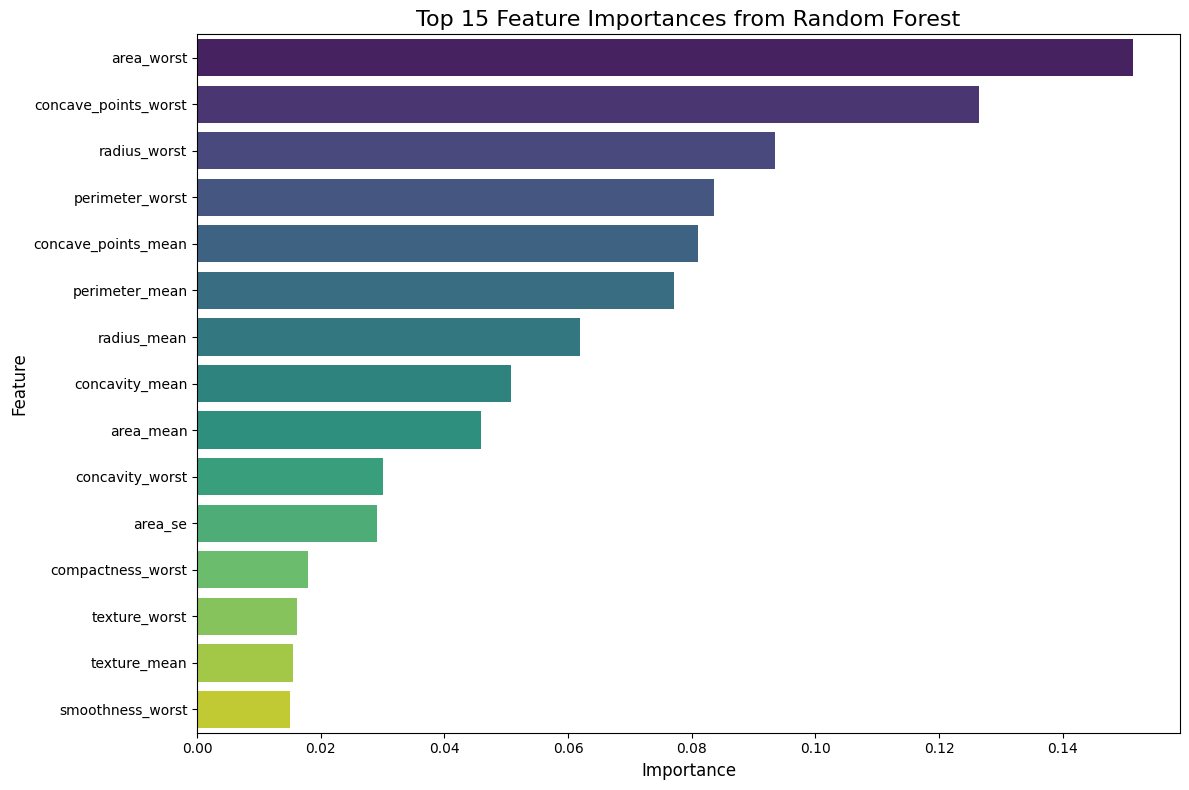

In [ ]:
print("\n--- Feature Importance Analysis ---")
# Extract the trained classifier from the pipeline
model = rf_pipeline.named_steps['classifier']

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 15 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()